In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Import data
data=pd.read_csv("Carbon_Emission_Data")

In [3]:
display(data)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


## Data Cleaning

- We are only interested in data from 1950's when industrialisation rapidly took place and CO2 emission increased rapidly, we will drop the remaining data
- Note: GDP is already adjusted for inflation

In [4]:
df = data[(data['year'] >= 1950) & (data['year'] <= 2018)] #dataset contains gdp data up till 2018, omit after 2018
df = df.reset_index(drop=True)
df.index = df.index + 1

display(df)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
1,Afghanistan,1950,AFG,7480464.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,...,NaN,0.129,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7571542.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,...,NaN,0.129,0.000,0.000,0.001,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7667534.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,...,NaN,0.129,0.000,0.000,0.001,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,7764549.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,...,NaN,0.129,0.000,0.000,0.001,0.0,NaN,NaN,NaN,NaN
5,Afghanistan,1954,AFG,7864289.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,...,NaN,0.129,0.000,0.000,0.001,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Zimbabwe,2014,ZWE,13855758.0,2.122250e+10,0.496,0.036,11.946,0.275,2.354,...,NaN,0.117,0.001,0.001,0.002,0.0,40.39,28.90,0.990,8.284
18796,Zimbabwe,2015,ZWE,14154937.0,2.102745e+10,0.585,0.041,12.255,0.309,2.585,...,NaN,0.116,0.001,0.001,0.002,0.0,42.30,30.70,1.333,10.879
18797,Zimbabwe,2016,ZWE,14452705.0,2.096179e+10,0.461,0.032,10.533,-1.722,-14.047,...,NaN,0.115,0.001,0.001,0.002,0.0,115.92,28.53,1.404,13.330
18798,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486


## Exploratory Analysis

Explore which countries we should use for Singapore to benchmark against

In [5]:
print("Number of regions/countries is: ", df['country'].nunique())

Number of regions/countries is:  278


In [6]:
sg = []
for index, row in df.iterrows():
    if row['country'] == 'Singapore':
        sg.append(row)

sg_df = pd.DataFrame(sg)
sg_df.index = sg_df.index + 1

display(sg_df)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
15327,Singapore,1950,SGP,1006712.0,3.650941e+09,0.0,0.0,1.914,1.914,NaN,...,NaN,0.007,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN
15328,Singapore,1951,SGP,1048942.0,3.597361e+09,0.0,0.0,2.826,0.912,47.642,...,NaN,0.007,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN
15329,Singapore,1952,SGP,1096241.0,2.639434e+09,0.0,0.0,3.441,0.616,21.783,...,NaN,0.008,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN
15330,Singapore,1953,SGP,1148757.0,3.329889e+09,0.0,0.0,3.482,0.040,1.174,...,NaN,0.008,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN
15331,Singapore,1954,SGP,1206225.0,3.996737e+09,0.0,0.0,3.771,0.290,8.317,...,NaN,0.009,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15391,Singapore,2014,SGP,5570505.0,3.655211e+11,0.0,0.0,52.252,1.370,2.693,...,NaN,0.073,0.0,0.001,0.001,0.0,60.61,60.66,137.736,263.599
15392,Singapore,2015,SGP,5650020.0,3.725858e+11,0.0,0.0,56.466,4.214,8.064,...,NaN,0.075,0.0,0.001,0.001,0.0,62.33,62.38,108.186,191.594
15393,Singapore,2016,SGP,5711936.0,3.800272e+11,0.0,0.0,35.654,-20.812,-36.857,...,NaN,0.075,0.0,0.001,0.001,0.0,63.81,63.78,114.769,321.894
15394,Singapore,2017,SGP,5764489.0,3.965075e+11,0.0,0.0,37.157,1.502,4.213,...,NaN,0.075,0.0,0.001,0.001,0.0,67.59,67.56,119.167,320.716


In [7]:
#Correlation of GDP per capita compared to Singapore's
recent_gdp = []

for index,row in df.iterrows():
    if row['year'] == 2018: #Take most recent data, 2018
        recent_gdp.append(row)
        
recent_gdp_df = pd.DataFrame(recent_gdp)

#Check if every row is a unique country with no duplicate
is_unique = recent_gdp_df['country'].nunique() == len(recent_gdp_df)

print(is_unique)  # Output: True if every row is unique, False otherwise        

True


In [8]:
#Add gdp per capita column
recent_gdp_df['gdp_per_capita'] = recent_gdp_df['gdp'] / recent_gdp_df['population']

# Assuming 'country' is the column containing country names
singapore_gdp_per_capita_2018 = recent_gdp_df[recent_gdp_df['country'] == 'Singapore']['gdp_per_capita'].values[0]
print("Singapore's GDP per capita for 2018 is: ", round(singapore_gdp_per_capita_2018))


Singapore's GDP per capita for 2018 is:  70537


In [9]:
# Filter out countries/regions with similar GDP per capita to Singapore, ~20% deviation
reference_value = 70537
lowerbound = round(0.8 * reference_value)
upperbound = round(1.2 * reference_value)

barchart_df = recent_gdp_df[(recent_gdp_df['gdp_per_capita'] >= lowerbound) & (recent_gdp_df['gdp_per_capita'] <= upperbound)]

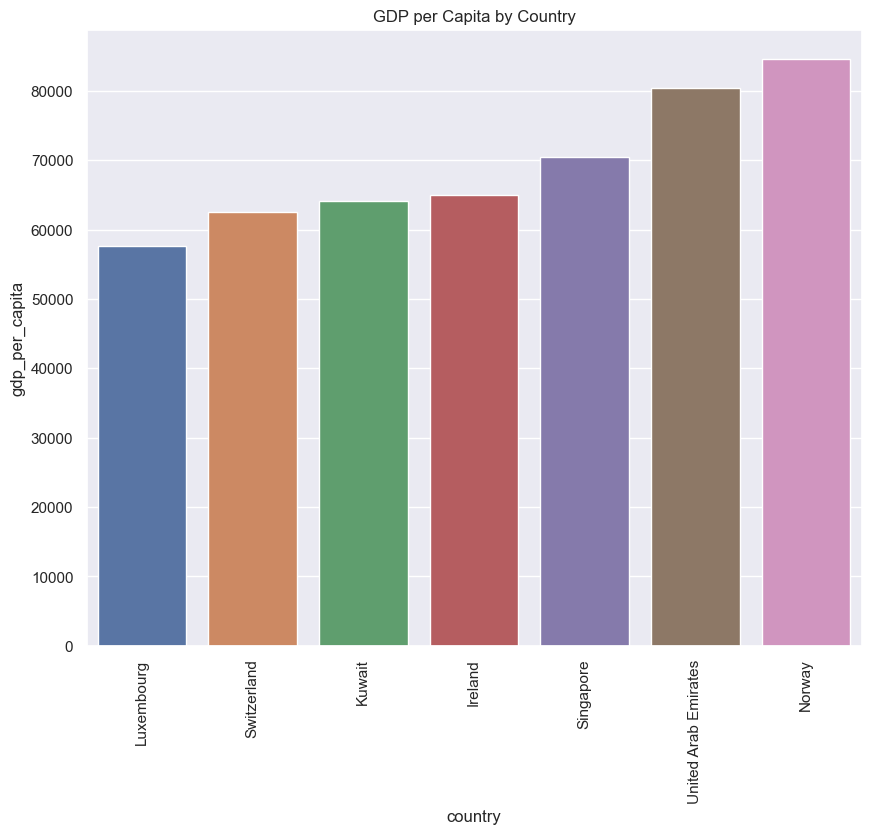

In [10]:
# Sort the DataFrame by 'gdp_per_capita' for better visualization
sorted_df = barchart_df.sort_values(by='gdp_per_capita')

# Create a bar plot
plt.figure(figsize=(10, 8))
sb.barplot(data=sorted_df, x='country', y='gdp_per_capita')
plt.xticks(rotation=90)  
plt.title('GDP per Capita by Country')
plt.show()

## Observations 

We have identified 6 other countries with similar GDP per capita as Singapore's. Namely:
1. Luxembourg
2. Switzerland
3. Kuwait
4. Ireland
5. United Arab Emirates
6. Norway

We will benchmark Singapore with these countries and compare their CO2 emissions, Carbon tax as well as its effects of carbon tax on GDP per capita.

We note the exception of Kuwait and United Arab Emirates that currently have not implemented any carbon taxing. As a result the counties that we will carry out further analysis is:

1. Luxembourg
2. Switzerland
3. Ireland
4. Norway

### Country 1 - Luxembourg 

Luxembourg has implemented a carbon tax on fossil fuels since January 1, 2021. The tax rate is set at €20 per tonne of CO2 and applies to gasoline, diesel, heating oil, and gas.

<img src="luxembourg_gdp_breakdown.png" alt="Alt text" width="500" height="500"/>


### Country 2 - Switzerland 

Switzerland has a carbon tax in place which was introduced in 2008. The tax is levied on heating fuels but not on motor fuels. The rate was CHF 96 per tonne of CO2 in 2020 and has been rising over the years.

The levy is currently set at CHF 96 (EUR 89)/tonne of CO2 and from 2022, will be CHF 120/tonne.

<img src="switzerland_gdp_breakdown.png" alt="Alt text" width="500" height="500"/>


### Country 3 - Ireland

Ireland introduced a carbon tax in the Government's 2010 Finance Bill. The tax applies to mineral oils, natural gas, and solid fuels supplied for combustion in Ireland. As of May 1, 2022, the tax for natural gas is €41 per tonne of CO2 emitted.

2010: 15 EUR per tonne of CO2
2012: 20 EUR per tonne
2022: 41 EUR per tonne
2023: 48.50 EUR per tonne

<img src="Ireland_gdp_breakdown.png" alt="Alt text" width="500" height="500"/>


### Country 4 - Norway 

Norway was one of the first countries to implement a carbon tax, starting in 1991. The tax covers the combustion of fossil fuels and the petroleum sector. Tax rates differ between industries, with petroleum production and natural gas extraction facing the highest rates. Norway has plans to more than triple its national carbon tax by 2030 to help reach its climate goals, with rates increasing from 590 Norwegian kroner per tonne to 2,000 kroner per tonne

<img src="norway_gdp_breakdown.png" alt="Alt text" width="500" height="500"/>


### Singapore

<img src="singapore_gdp_breakdown.png" alt="Alt text" width="500" height="500"/>


## Conclusion


Switzerland, Ireland and Norway provides the best base for benchmarking as their tax policy has been implemented for many years and its tax impact can be further analysed.

Upon further analysis, we decided that Switzerland is the best country for benchmarking as its GDP breakdown is very similar to that of Singapore's and it has a long standing and evolving carbon tax policy that reflects a strong commitment to reduce greenhouse gas emissions while maintaining strong economic standing as shown in its GDP per capita.

Furthermore, Switzerland's major exports are machinery and equipment, chemical-pharmaceutical products which are very similar to Singapore's

## Exploratory Data Analysis of Switzerland and Singapore 

In [11]:
switzerland = []
for index, row in df.iterrows():
    if row['country'] == 'Switzerland':
        switzerland.append(row)

switzerland_df = pd.DataFrame(switzerland)
switzerland_df = switzerland_df.reset_index()
switzerland_df.index = switzerland_df.index + 1

#appending gdp per capita column 
switzerland_df['gdp_per_capita'] = switzerland_df['gdp']/switzerland_df['population']
sg_df['gdp_per_capita'] = sg_df['gdp']/sg_df['population']

### Time Series Analysis Between Singapore and Switzerland 

### CO2 Emissions per capita between both countries 

Note: Data is based on territorial emissions which inlcludes good produced for export. This is a very useful way of measurement given Switzerland and Singapore are heavily export based.

Switzerland: Imports of goods and services as percentage of GDP is 59.48 %.  Exports of goods and services as percentage of GDP is 71.37 %.

Singapore: Imports of goods and services as percentage of GDP is 149.04 %. Exports of goods and services as percentage of GDP is 184.30 %.


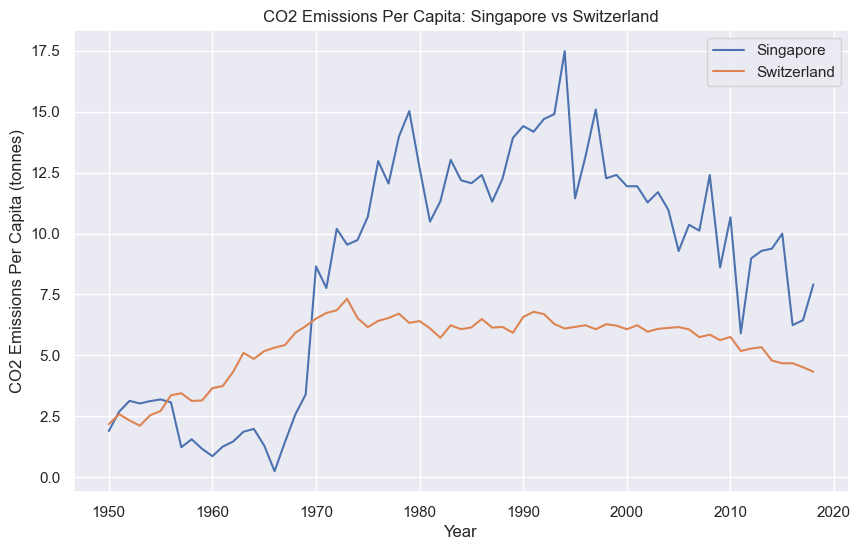

In [14]:
plt.figure(figsize=(10,6))
plt.title('CO2 Emissions Per Capita: Singapore vs Switzerland')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita (tonnes)')

plt.plot(sg_df['year'], sg_df['co2_per_capita'], label='Singapore')
plt.plot(switzerland_df['year'], switzerland_df['co2_per_capita'], label='Switzerland')

plt.legend()
plt.show()


### GDP per capita between both countries

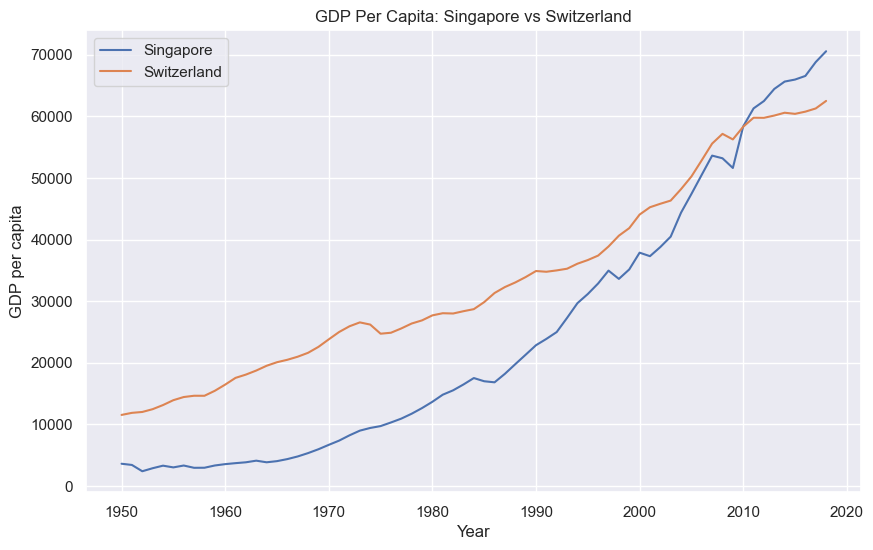

In [16]:
plt.figure(figsize=(10,6))
plt.title('GDP Per Capita: Singapore vs Switzerland')
plt.xlabel('Year')
plt.ylabel('GDP per capita')

plt.plot(sg_df['year'], sg_df['gdp_per_capita'], label='Singapore')
plt.plot(switzerland_df['year'], switzerland_df['gdp_per_capita'], label='Switzerland')

plt.legend()
plt.show()

### CO2 per GDP between both countries 

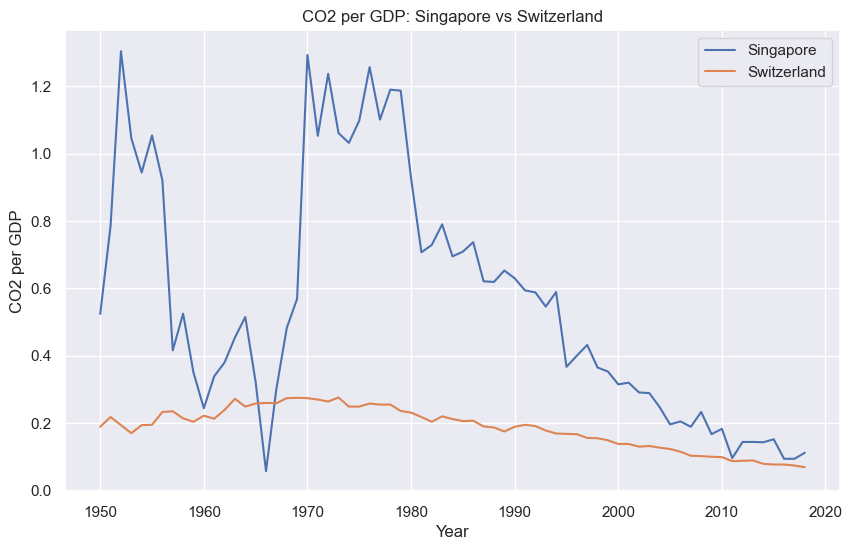

In [18]:
plt.figure(figsize=(10,6))
plt.title('CO2 per GDP: Singapore vs Switzerland')
plt.xlabel('Year')
plt.ylabel('CO2 per GDP')

plt.plot(sg_df['year'], sg_df['co2_per_gdp'], label='Singapore')
plt.plot(switzerland_df['year'], switzerland_df['co2_per_gdp'], label='Switzerland')

plt.legend()
plt.show()

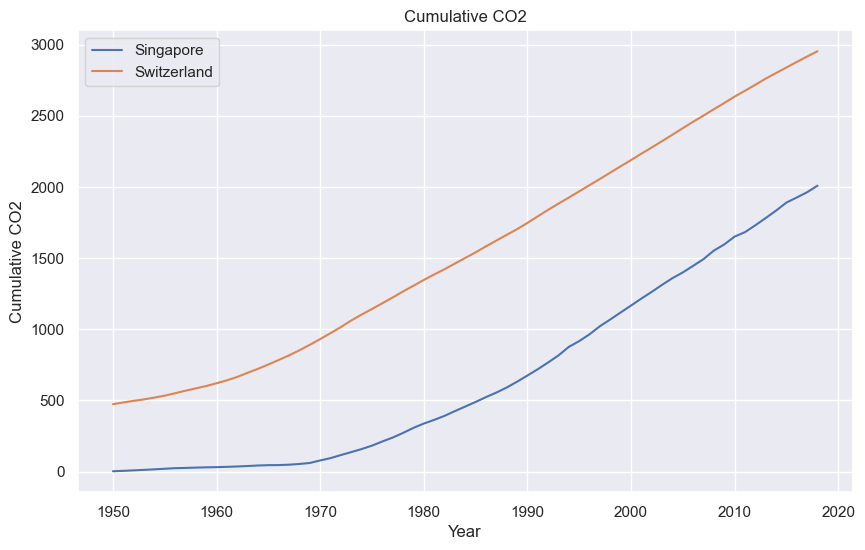

In [19]:
plt.figure(figsize=(10,6))
plt.title('Cumulative CO2')
plt.xlabel('Year')
plt.ylabel('Cumulative CO2')

plt.plot(sg_df['year'], sg_df['cumulative_co2'], label='Singapore')
plt.plot(switzerland_df['year'], switzerland_df['cumulative_co2'], label='Switzerland')

plt.legend()
plt.show()

### CO2 emissions in trade (both import and export) between both countries 

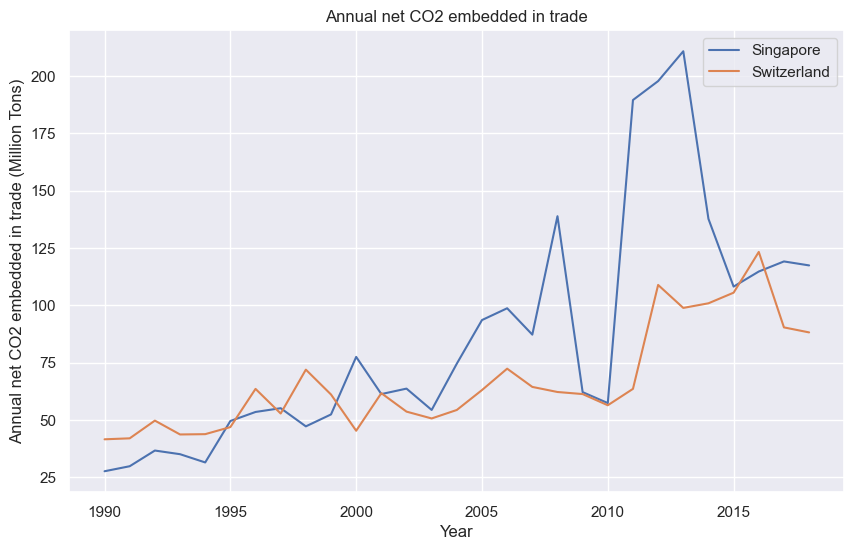

In [21]:
plt.figure(figsize=(10,6))
plt.title('Annual net CO2 embedded in trade')
plt.xlabel('Year')
plt.ylabel('Annual net CO2 embedded in trade (Million Tons)')

plt.plot(sg_df['year'], sg_df['trade_co2'], label='Singapore')
plt.plot(switzerland_df['year'], switzerland_df['trade_co2'], label='Switzerland')

plt.legend()
plt.show()

### Determining the optimal carbon tax

Switzerland implemented carbon tax of 12CHF in 2008, followed by a 60CHF in 2014,84CHF in 2016, 96CHF in 2018 and 120CHF in 2022.

<img src="switzerland_econs.png" alt="Alt text" width="500" height="500"/>
<img src="singapore_econs.png" alt="Alt text" width="500" height="500"/>
